In [1]:
# Intialization for notebook use
%pylab inline
from sympy import *
init_session()
init_printing(use_latex=True)

Populating the interactive namespace from numpy and matplotlib
IPython console for SymPy 1.0 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [38]:
x_1, x_2 = symbols('x_1 x_2') # indentify these as symbols
λ = symbols('λ')

# Introduction

Consider the following 2nd order system (Mass-Damper-Spring):

$\ddot{x} + \dot{x} = 3x + x^2 = 0 \Longleftrightarrow \ddot{x} + c \dot{x} + f(x) = 0$

$c$ is the dampening force and $f(x)$ is the non-linear spring.  

The system can be placed into the $\dot{\underline{x}} = \underline{f}(\underline{x})$ form:

$\begin{cases}
    \dot{x}_1 = x_2 \\
    \dot{x}_2 = -3x_1 - x_1^2 - x_2
\end{cases}$

# Analysis of the system: Manual

Analysis of the system $\Rightarrow$ Phase Plane $(x_1, x_2)$:

## Step 1: Find the Equillibrium Points:

$\begin{cases}
    f_1(x_1, x_2) = 0 \\
    f_2(x_2, x_2) = 0
\end{cases} \Rightarrow
\begin{cases}
    x_2 && = 0 \\
    -3x_1 - x_1^2 - x_2 && = 0 \, \Rightarrow \, -3x_1 - x_1^2 = 0
\end{cases}$

$\begin{cases}
    x_2 = 0 \\
    x_1(-3 - x_1) = 0
\end{cases} \Rightarrow$ 2 equillibrium points $\Rightarrow
\begin{cases}
    \underline{x}_1 = [0, 0]^T \\
    \underline{x}_2 = [-3, 0]^T
\end{cases}$

## Step 2: Linearize the System Around the Equillibrium Points:

$\displaystyle\dot{\underline{x}} = \underline{f}(\underline{x}) \Rightarrow \approx \underline{f}(\underline{x}^*) + \left . \frac{\partial \underline{f}}{\partial \underline{x}} \right |_{\underline{x}^*} (\underline{x} - \underline{x}^*)$

$\displaystyle A = \left . \frac{\partial\underline{f}}{\partial\underline{x}} \right |_{\underline{x}_{1, \, 2}^*} = 
\begin{bmatrix}
    0 && 1 \\
    -3 - 2x_1 && -1
\end{bmatrix}_{\underline{x}_1^*, \, \underline{x}_2^*}$

### For $\underline{x} = \underline{x}_1$ 

We have the following system:

$\dot{\underline{x}} = A_1 \underline{x} \Rightarrow A_1 = 
\begin{bmatrix}
    0 && 1 \\
    -3 && -1
\end{bmatrix}$

Look for the behavior of the system near $\underline{x}_1 = \underline{0}$.  e-value analysis:

$\det (A_1 - \lambda I) = 
\begin{vmatrix}
    -\lambda && 1 \\
    -3 && -1 - \lambda
\end{vmatrix}
= \lambda \big(\lambda + 1\big) + 3 = 0$

$\Rightarrow \lambda^2 + \lambda + 3 = 0 \Rightarrow \lambda_{12} = -\frac{1}{2} \left( 1 \pm \sqrt{1 - 12}\right) = -\frac{1}{2} \left( 1 \pm \sqrt{11} j\right)$



### For $\underline{x} = \underline{x}_2$

We have the following system:

$\dot{\underline{x}} = A_2 \underline{x} \Rightarrow A_2 = 
\begin{bmatrix}
    0 && 1 \\
    3 && -1
\end{bmatrix}$

Look for the behavior of the system near $\underline{x}_2 = \underline{0}$.  e-value analysis:

$\left|(A - \lambda I ) \right| = 
\begin{vmatrix}
    -\lambda && 1 \\
    3 && -1 - \lambda
\end{vmatrix} = 0$

$\Rightarrow \lambda \left(\lambda + 1 \right) - 3 = 0 \Rightarrow \, \lambda^2 + \lambda - 3 = 0$

$\lambda = -\frac{1}{2} \left ( 1 \pm \sqrt{1 + 12} \right) = - \frac{1}{2} \pm \frac{1}{2} \sqrt{13}$

Note that both solutions of $\lambda$ are REAL!  Therefore:

$\begin{matrix}
    \lambda_1 = -\frac{1}{2} \left( 1 - \sqrt{13} \right ) > 0 \\
    \lambda_2 = -\frac{1}{2} \left( 1 + \sqrt{13} \right ) < 0
\end{matrix} \Rightarrow \text{ Unstable } \Rightarrow \underline{\text{Saddle Point}}$

Compute the e-vectors $\underline{v}_1,\, \underline{v}_2$ to determine the direction of convergence

## Step 3: Put Everything Together:

## !!!!! TODO: Insert Graphic !!!!!

# Analysis of the System: Python

Given that:

$\begin{cases}
    \dot{x}_1 = f_1(x_1, x_2) = x_2 \\
    \dot{x}_2 = f_2(x_2, x_2) = -3x_1 - x_1^2 - x_2
\end{cases}$

We can define two variables to these functions:

In [7]:
f_1 = x_2
f_2 = -3 * x_1 - x_1 ** 2 - x_2

We can solve the system of equations using the `solve` function.

In [8]:
slns = solve([f_1, f_2])
slns

We get the same solutions that we found previously.  

To linearize the system, we need to take the derivatives of each function with respect to $x_1$ and $x_2$.  We'll compile this into a matrix A_1 like so:

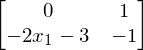

In [35]:
A = Matrix([[diff(f_1, x_1), diff(f_1, x_2)], [diff(f_2, x_1), diff(f_2, x_2)]])
A

Now we let $\dot{\underline{x}} = A_1 \, \underline{x}$.  Therefore `A_1` would be:

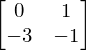

In [37]:
A_1 = Matrix([[0, 1], [-3, -1]])
A_1

Next we find the determinate of $A_1 - \lambda I$

In [40]:
λ_fun = det(A_1 - λ * eye(2))
λ_fun

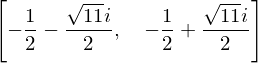

In [42]:
solve(λ_fun)